## K-Nearest Neighbors
#### import modules

In [ ]:

from Functions import *
from Modules   import *

Read DataFrame

In [3]:
# --------- Read the Data ---------------

df    = pd.read_csv('..\\Data\\data_train.csv')
X_aim = pd.read_csv('..\\Data\\features_aim.csv')
# --- Clean and prepare data and Aim -----

X_train, X_test, y_train, y_test, X_aim = CLEAN_All_DATA(df, X_aim)

Display the data 

In [4]:
print('Shape of X_train is', X_train.shape)
display(X_train.head(2))
print('-- '*45, '\n')
print('Shape of X_test is', X_test.shape)
display(X_test.head(2))

Shape of X_train is (59058, 33)


,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,...,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurchDate_year,PurchDate_month,PurchDate_dayofweek
21430,OTHER,2004,5,CHEVROLET,VENTURE FWD V6 3.4L,LS,PASSENGER 3.4L,GREEN,AUTO,Covers,...,YELLOW,99750,39208,MS,4700.0,0,4622,2009,6,3
53433,OTHER,2007,2,KIA,RIO 1.6L I4 MPI,Bas,4D SEDAN,SILVER,AUTO,Covers,...,YELLOW,3453,80229,CO,5255.0,0,533,2009,9,3


-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --  

Shape of X_test is (6562, 33)


,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelType,...,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurchDate_year,PurchDate_month,PurchDate_dayofweek
37974,ADESA,2005,4,CHEVROLET,TRAILBLAZER 2WD 6C 4,LS,4D SUV 4.2L,SILVER,AUTO,Alloy,...,YELLOW,21053,85226,AZ,7695.0,0,834,2009,2,2
13948,OTHER,2001,8,FORD,TAURUS 3.0L V6 EFI,SEL,4D SEDAN SE COMFORT,WHITE,AUTO,Alloy,...,YELLOW,20833,75061,TX,4155.0,0,1220,2009,2,1


Target categorical distribution 

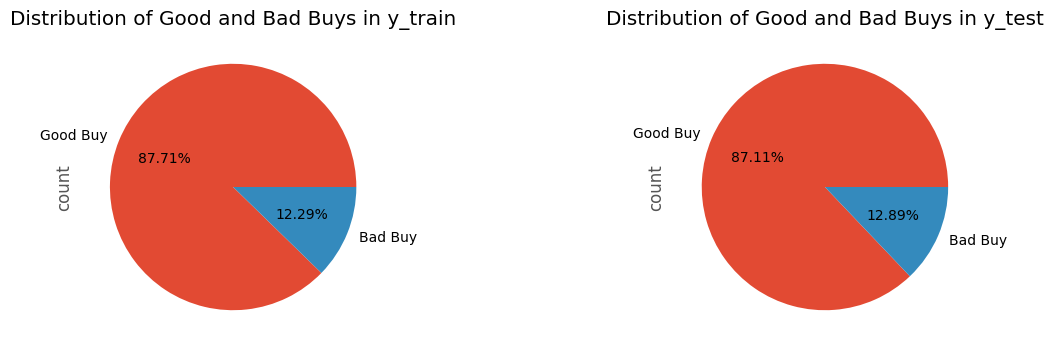

In [5]:
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = [14,4])

#  ---------------------------------------------------------
target_distribution = pd.crosstab(index    = y_train, 
                                  columns   ='count', 
                                  normalize = True, )

target_distribution.plot(kind    = 'pie', 
                         y       = 'count', 
                         labels  = ['Good Buy', 'Bad Buy'],
                         autopct = '%.2f%%',
                         legend  = False,
                         ax      = ax[0])

ax[0].set_title('Distribution of Good and Bad Buys in y_train')
#  ---------------------------------------------------------
target_distribution = pd.crosstab(index     = y_test,
                                  columns   ='count',
                                  normalize = True,)

target_distribution.plot(kind    = 'pie', 
                         y       = 'count', 
                         labels  = ['Good Buy', 'Bad Buy'],
                         autopct = '%.2f%%',
                         legend  = False,
                         ax      = ax[1])

ax[1].set_title('Distribution of Good and Bad Buys in y_test');

Correlation heatmap

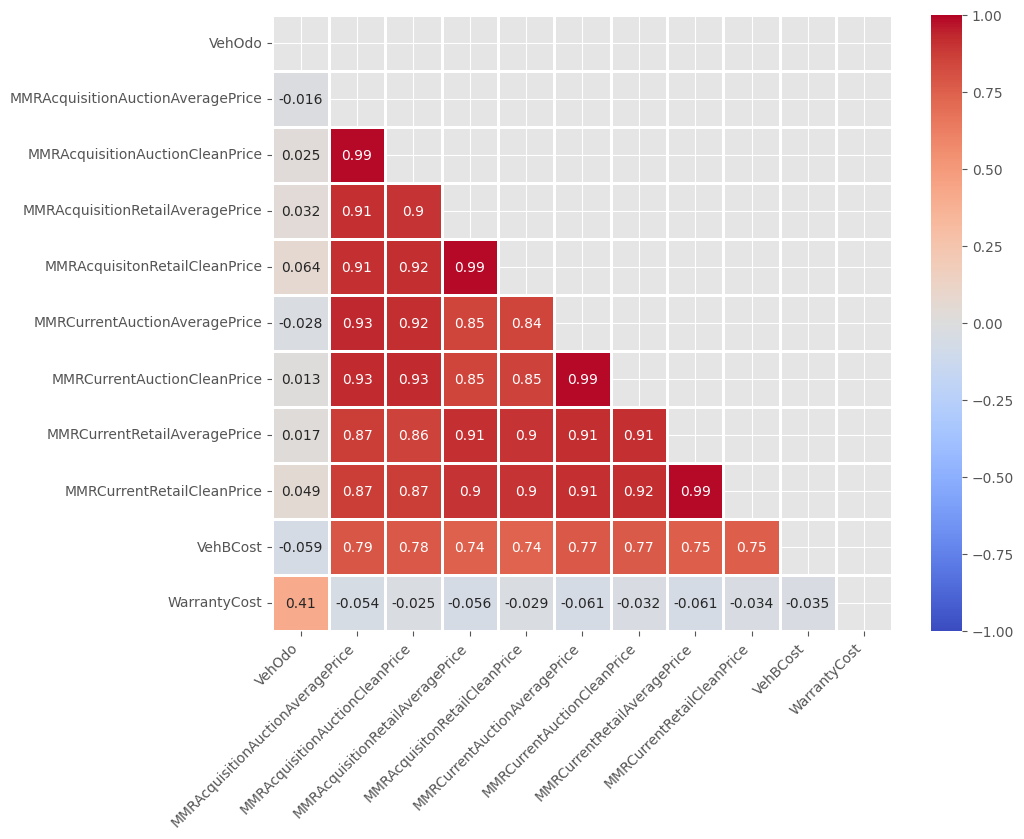

In [6]:
fig, ax = plt.subplots(figsize = [10,8])
# ---------------------------------------------------------

heatmap = sns.heatmap(X_train.corr(numeric_only=True), 
                      vmin       = -1, 
                      vmax       = 1, 
                      cmap       ='coolwarm', 
                      annot      = True, 
                      mask       = np.triu(X_train.corr(numeric_only=True)),
                      linewidths = 1,
                      linecolor  = 'white',
                      ax         = ax)

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right');

Check NaNs in DataFrame

In [7]:
#  --------------------------------- Check missing values or NaNs after imputers -------------------------------
# Concatenate the two DataFrames horizontally
print('Check missing values or NaNs after imputers\n','-- '*20)
pd.concat([X_train.isna().sum(), X_test.isna().sum()], axis=1, keys=['Train Missing', 'Test Missing'])

Check missing values or NaNs after imputers
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 


,Train Missing,Test Missing
Auction,0,0
VehYear,0,0
VehicleAge,0,0
Make,0,0
Model,0,0
Trim,0,0
SubModel,0,0
Color,0,0
Transmission,0,0
WheelType,0,0



#### KNN Base Model's pipeline without PCA

In [8]:
# StandardScaler and then PCA for numerical features
# -----------------------------------------------------

pipeline    = Pipeline([('scaler', StandardScaler())])

preprocessor = ColumnTransformer([('num', pipeline, num_cols),
                                  ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
                                 ])

model_knn    = KNeighborsClassifier(n_neighbors=3)


pipeline_knn = Pipeline([('preprocessor', preprocessor),
                         ('knnClassifier', model_knn)
                        ])

pipeline_knn.fit(X_train, y_train)

# Evaluate the model:
pred_knn        = pipeline_knn.predict(X_test)
f1_knn          = f1_score(y_test, pred_knn)
recall_knn      = recall_score(y_test, pred_knn)
precision_knn   = precision_score(y_test, pred_knn)
accuracy_knn    = accuracy_score(y_test, pred_knn)

knn_metrics     = pd.DataFrame({
                               'Model'    : ['K-Nearest Neighbors'],
                               'F1 Score' : [f1_knn],
                               'Recall'   : [recall_knn],
                               'Precision': [precision_knn],
                               'Accuracy' : [accuracy_knn]
                            })

Scores and confusion matrix

Scoring of K-Nearest Neighbors Classifier



Model,F1 Score,Recall,Precision,Accuracy
K-Nearest Neighbors,0.178694,0.122931,0.327044,0.854313


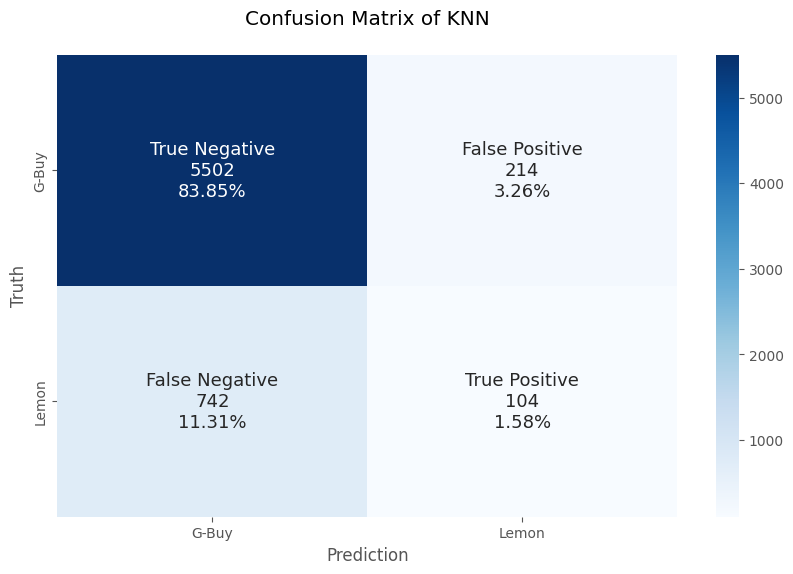

In [9]:
print('Scoring of K-Nearest Neighbors Classifier\n')
display(knn_metrics.style.hide())
Confusion_Matrix_Func(y_test, pred_knn, 'KNN')

#### KNN Base Model pipeline with PCA

In [10]:

# StandardScaler and then PCA for numerical features
# -----------------------------------------------------

pca_pipeline     = Pipeline([('scaler', StandardScaler()),
                             ('pca', PCA(n_components=0.98))
                            ])

preprocessor     = ColumnTransformer([('num', pca_pipeline, num_cols),
                                      ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
                                     ])

model_knn_PCA    = KNeighborsClassifier(n_neighbors=3)


pipeline_knn_PCA = Pipeline([('preprocessor', preprocessor),
                             ('knnClassifier', model_knn_PCA)
                           ])

pipeline_knn_PCA.fit(X_train, y_train)

# Evaluate the model:
pred_knn_PCA        = pipeline_knn_PCA.predict(X_test)
f1_knn_PCA          = f1_score(y_test, pred_knn)
recall_knn_PCA      = recall_score(y_test, pred_knn)
precision_knn_PCA   = precision_score(y_test, pred_knn)
accuracy_knn_PCA    = accuracy_score(y_test, pred_knn)

knn_metrics_PCA = pd.DataFrame({
                                'Model'    : ['K-Nearest Neighbors'],
                                'F1 Score' : [f1_knn_PCA],
                                'Recall'   : [recall_knn_PCA],
                                'Precision': [precision_knn_PCA],
                                'Accuracy' : [accuracy_knn_PCA]
                              })

Scores and confusion matrix

Scoring of K-Nearest Neighbors Classifier



Model,F1 Score,Recall,Precision,Accuracy
K-Nearest Neighbors,0.178694,0.122931,0.327044,0.854313


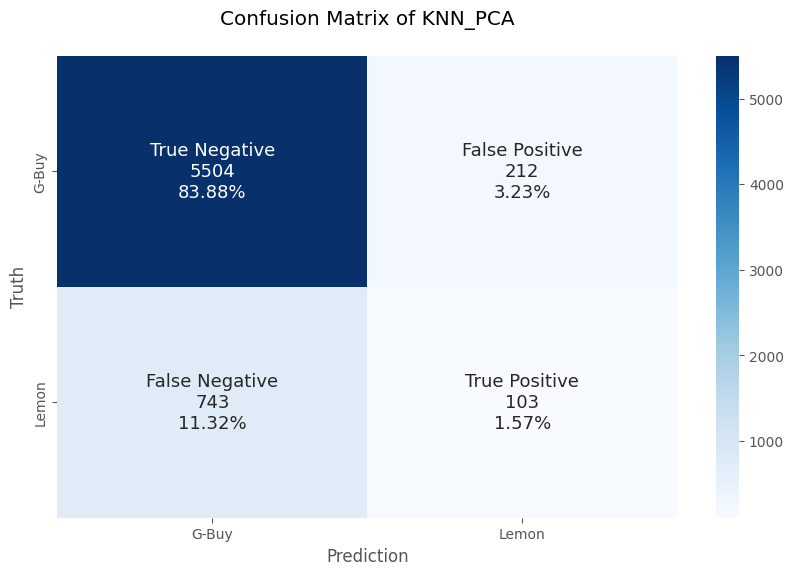

In [11]:
print('Scoring of K-Nearest Neighbors Classifier\n')
display(knn_metrics_PCA.style.hide())
Confusion_Matrix_Func(y_test, pred_knn_PCA, 'KNN_PCA')

#### Optimised KNN Pipeline and GridSearch  

In [12]:
# Model's Pipeline

#k               = np.unique(np.geomspace(1,20, 5, dtype = 'int'))
search_space_knn = {
                    'knnClassifier__n_neighbors': range(2, 5),
                    'knnClassifier__weights'    : ['uniform', 'distance']
                   }


# StandardScaler and then PCA for numerical features
num_pipeline = Pipeline([
                        ('scaler', StandardScaler()),
                        ('pca'   , PCA(n_components=0.98))
                        ])

preprocessor = ColumnTransformer([
                                ('num', num_pipeline, num_cols),
                                ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
                                ])

model_knn      = KNeighborsClassifier()


pipeline_knn   = Pipeline([
                          ('preprocessor', preprocessor),
                          ('knnClassifier', model_knn)
                        ])

model_knn_grid = GridSearchCV(estimator    = pipeline_knn, 
                              param_grid   = search_space_knn,
                              scoring      = 'f1',
                              cv           = 3,
                              n_jobs       = 8)

Model Fitting

In [13]:

# Fitting the GridSearch KNN Model

model_knn_grid.fit(X_train, y_train)
optimised_knn_grid   = model_knn_grid.best_estimator_
optimised_knn_params = model_knn_grid.best_params_

# Evaluate the model:
pred_knn_grid        = optimised_knn_grid.predict(X_test)
f1_knn_grid          = f1_score(y_test       , pred_knn_grid)
recall_knn_grid      = recall_score(y_test   , pred_knn_grid)
precision_knn_grid   = precision_score(y_test, pred_knn_grid)
accuracy_knn_grid    = accuracy_score(y_test , pred_knn_grid)


grid_KNN_metrics     = pd.DataFrame({
                                    'Model'    : ['GridSearch Optimised KNN'],
                                    'F1 Score' : [f1_knn_grid],
                                    'Recall'   : [recall_knn_grid],
                                    'Precision': [precision_knn_grid],
                                    'Accuracy' : [accuracy_knn_grid]
                                    })

Optimised Model and hyperparameters 

In [14]:
print('Scoring of GridSearch Optimised KNN Classifier')
print('Optimised KNN Model:'     , optimised_knn_grid)
print('Optimised KNN Parameters:', optimised_knn_grid)

Scoring of GridSearch Optimised KNN Classifier
Optimised KNN Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.98))]),
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice',
                                                   'MMRCurrentAuctionAveragePrice',
                                                   'MMRCurrentAuctionCleanPrice',


Scores

Scoring of GridSearch Optimised KNN


Model,F1 Score,Recall,Precision,Accuracy
GridSearch Optimised KNN,0.226923,0.209220,0.247899,0.816215


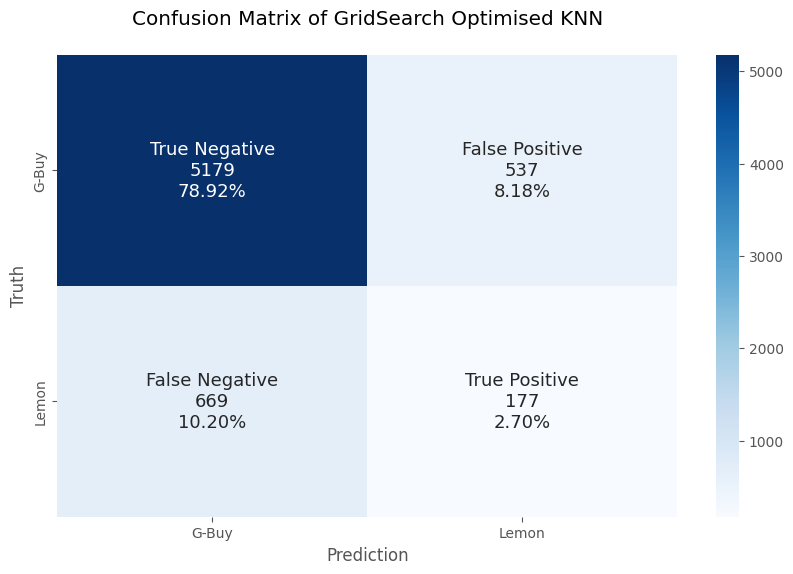

In [16]:
print('Scoring of GridSearch Optimised KNN')
display(grid_KNN_metrics.style.hide())
Confusion_Matrix_Func(y_test, pred_knn_grid, 'GridSearch Optimised KNN')

Save the optimised model

In [17]:

directory_path = r"D:\Visual Studio Code\Used Cars Sales\Pickle"
filename = "Optimised_GridSearch_KNN.p"

# Save to the specified directory
pickle.dump(optimised_knn_grid, open(directory_path + "\\" + filename, "wb"))
